In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("/Users/victorrobert-faille/Downloads/Metro_Interstate_Traffic_Volume.csv", parse_dates=["date_time"])

In [8]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
df.date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

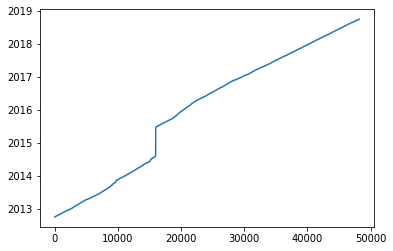

In [13]:
df.date_time.plot()

In [64]:
df1 = df[df.date_time>pd.to_datetime("2016-1-1")].copy()

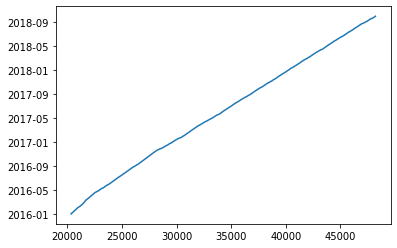

In [65]:
df1.date_time.plot()

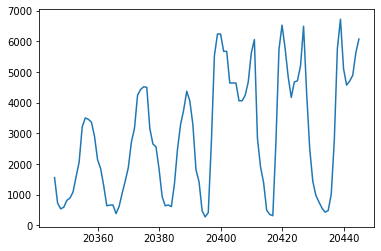

In [66]:
df1.traffic_volume[:100].plot()

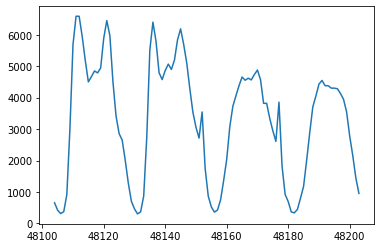

In [67]:
df1.traffic_volume[-100:].plot()

In [68]:
df1.date_time.dt.weekday 

20346    4
20347    4
20348    4
20349    4
20350    4
        ..
48199    6
48200    6
48201    6
48202    6
48203    6
Name: date_time, Length: 27858, dtype: int64

In [69]:
import statsmodels.tsa.api as smt

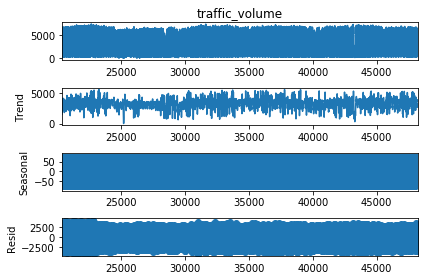

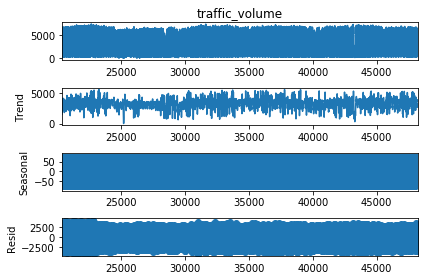

In [70]:
smt.seasonal_decompose(df1.traffic_volume, period=24).plot()

In [71]:
sd=smt.seasonal_decompose(df1.traffic_volume, period=24)

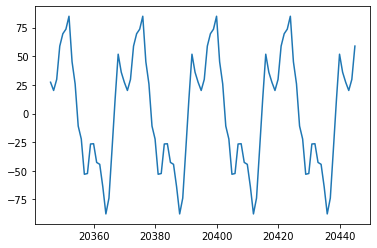

In [72]:
sd.seasonal[:100].plot()

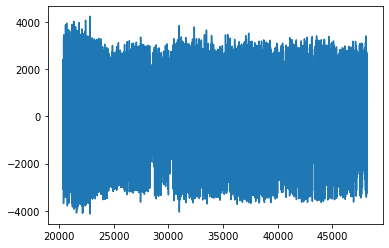

In [73]:
sd.resid.plot()

In [74]:
sd=smt.seasonal_decompose(sd.resid.dropna(), period=24*7)

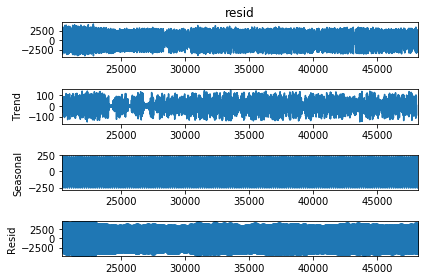

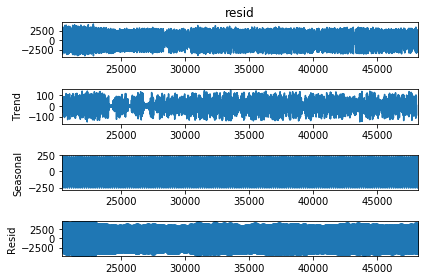

In [75]:
sd.plot()

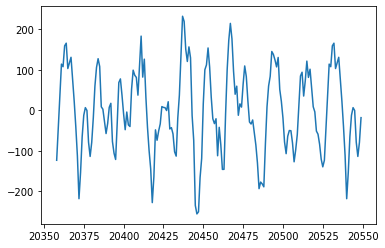

In [76]:
sd.seasonal[:24*8].plot()

In [77]:
sd=smt.seasonal_decompose(df1.traffic_volume, period=24*7)

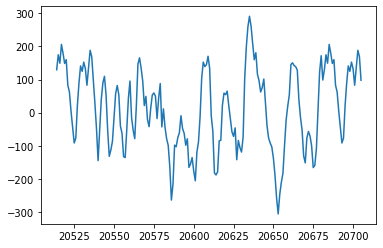

In [78]:
sd.seasonal[24*7:24*15].plot()

In [79]:
df1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20346,None,266.00,0.0,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550
20347,None,266.01,0.0,0.0,90,Snow,light snow,2016-01-01 03:00:00,719
20348,None,264.80,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533
20349,None,264.38,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 05:00:00,586
20350,None,263.99,0.0,0.0,1,Clear,sky is clear,2016-01-01 06:00:00,809


In [80]:
df1=pd.get_dummies(data=df1, columns=['holiday']).drop('holiday_None',axis=1)

In [81]:
df1.weather_main.unique()

array(['Snow', 'Clouds', 'Clear', 'Mist', 'Fog', 'Rain', 'Haze',
       'Drizzle', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

In [82]:
df1=pd.get_dummies(data=df1, columns=['weather_main'], drop_first=True)

In [84]:
df1.head()

,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
20346,266.00,0.0,0.0,90,light snow,2016-01-01 01:00:00,1550,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20347,266.01,0.0,0.0,90,light snow,2016-01-01 03:00:00,719,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20348,264.80,0.0,0.0,90,overcast clouds,2016-01-01 04:00:00,533,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20349,264.38,0.0,0.0,90,overcast clouds,2016-01-01 05:00:00,586,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20350,263.99,0.0,0.0,1,sky is clear,2016-01-01 06:00:00,809,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df1.weather_description.unique()

array(['light snow', 'overcast clouds', 'sky is clear', 'broken clouds',
       'scattered clouds', 'mist', 'fog', 'light rain', 'haze', 'snow',
       'moderate rain', 'light intensity drizzle', 'heavy snow',
       'drizzle', 'few clouds', 'heavy intensity rain',
       'proximity thunderstorm', 'proximity shower rain', 'Sky is Clear',
       'thunderstorm', 'thunderstorm with light rain',
       'thunderstorm with heavy rain',
       'proximity thunderstorm with drizzle', 'smoke',
       'heavy intensity drizzle', 'thunderstorm with rain',
       'light intensity shower rain', 'proximity thunderstorm with rain',
       'very heavy rain', 'thunderstorm with drizzle', 'SQUALLS',
       'freezing rain', 'shower drizzle', 'light shower snow', 'sleet',
       'light rain and snow', 'thunderstorm with light drizzle'],
      dtype=object)

In [86]:
df2=df1.drop('weather_description',axis=1)

In [87]:
import statsmodels.api as st

In [88]:
y=df2.traffic_volume
X=df2.drop('traffic_volume',axis=1)

In [90]:
X1=X.copy()
X1['period']=X1.index-X1.index.min()+1
X1.period

20346        1
20347        2
20348        3
20349        4
20350        5
         ...  
48199    27854
48200    27855
48201    27856
48202    27857
48203    27858
Name: period, Length: 27858, dtype: int64

In [101]:
X1['period']=(X1.date_time-X1.date_time.min()).astype(int)/3600000000000

In [112]:
st.OLS(y,st.add_constant(X1.drop('date_time',axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     55.68
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          8.13e-282
Time:                        20:22:19   Log-Likelihood:            -2.5016e+05
No. Observations:               27858   AIC:                         5.004e+05
Df Residuals:                   27831   BIC:                         5.006e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2510.5794    292.357     -8.587      0.000   -3083.613   -1937.546
temp                                 19.3460      1.041     18.584      0.000      17.306      21.386
rain_1h                               0.1957      0.196      1.001      0.317      -0.188       0.579
snow_1h                            -186.6436   2824.093     -0.066      0.947   -5722.005    5348.718
clouds_all                            6.4186      0.464     13.829      0.000       5.509       7.328
holiday_Christmas Day             -2051.4495   1110.182     -1.848      0.065   -4227.460     124.561
holiday_Columbus Day              -2516.0667   1359.594     -1.851      0.064   -5180.937     148.804
holiday_Independence Day          -1968.1313   1110.213     -1.773      0.076   -4144.204     207.941
holiday_Labor Day                 -2126.2695    860.106     -2.472      0.013   -3812.119    -440.420
holiday_Martin Luther King Jr Day -2212.7360    860.431     -2.572      0.010   -3899.224    -526.248
holiday_Memorial Day              -2141.0235   1110.287     -1.928      0.054   -4317.241      35.194
holiday_New Years Day             -1634.3488   1359.738     -1.202      0.229   -4299.503    1030.806
holiday_State Fair                -2628.5308   1110.137     -2.368      0.018   -4804.453    -452.608
holiday_Thanksgiving Day          -1804.1408   1359.579     -1.327      0.185   -4468.983     860.701
holiday_Veterans Day              -2122.0267   1359.624     -1.561      0.119   -4786.957     542.904
holiday_Washingtons Birthday      -2588.5797   1110.160     -2.332      0.020   -4764.549    -412.611
weather_main_Clouds                 309.7177     42.345      7.314      0.000     226.719     392.716
weather_main_Drizzle               -291.6554     69.525     -4.195      0.000    -427.929    -155.382
weather_main_Fog                   -616.5551     83.701     -7.366      0.000    -780.613    -452.497
weather_main_Haze                   154.1656     73.208      2.106      0.035      10.675     297.656
weather_main_Mist                  -461.9368     48.489     -9.527      0.000    -556.978    -366.896
weather_main_Rain                  -303.1705     53.091     -5.710      0.000    -407.231    -199.110
weather_main_Smoke                -1108.6881    556.202     -1.993      0.046   -2198.872     -18.504
weather_main_Snow                  -209.3469     62.674     -3.340      0.001    -332.190     -86.504
weather_main_Squall                 474.4518   1923.088      0.247      0.805   -3294.896    4243.800
weather_main_Thunderstorm          -587.0219     83.859     -7.000      0.000    -751.391    -422.653
period                                0.0050      0.002      2.911      0.004       0.002       0.008
=======================

In [106]:
X1.dtypes

temp                                        float64
rain_1h                                     float64
snow_1h                                     float64
clouds_all                                    int64
date_time                            datetime64[ns]
holiday_Christmas Day                         uint8
holiday_Columbus Day                          uint8
holiday_Independence Day                      uint8
holiday_Labor Day                             uint8
holiday_Martin Luther King Jr Day             uint8
holiday_Memorial Day                          uint8
holiday_New Years Day                         uint8
holiday_State Fair                            uint8
holiday_Thanksgiving Day                      uint8
holiday_Veterans Day                          uint8
holiday_Washingtons Birthday                  uint8
weather_main_Clouds                           uint8
weather_main_Drizzle                          uint8
weather_main_Fog                              uint8
weather_main

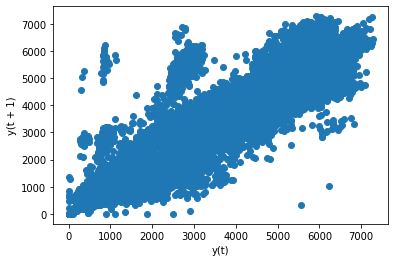

In [119]:
pd.plotting.lag_plot(y)